In [64]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [65]:
def get_test_train(location):
    location = '~/Documents/SMAI/Assignment2/' + location
    dataframe = pd.read_csv(location)
    train  = dataframe[:int(0.8*len(dataframe))]
    test = dataframe[int(0.8*len(dataframe)):]
    return test,train

In [85]:
def minkowski_predict(test_row,train_row,power):
    dist = 0
    for attribute in range(1,len(test_row) - 1):
        dist+=(pow(abs(test_row[attribute] - train_row[attribute]),power))
    return dist    

In [86]:
def getsecond(item):
    return item[1]
def KNN(test,train,K,dist_measure):
    if dist_measure == 'euclid':
        power = 2
    elif dist_measure == 'cheby':
        power = 1
    predicted = []
    for test_row in test.values:
        knn = []
        count_0 = 0
        count_1 = 0
        for train_row in train.values:
            y = minkowski_predict(test_row,train_row,power)
            knn.append((train_row[0],y))
        knn.sort(key = getsecond)
        for i in range(0,K):
            if knn[i][0] == 0:
                count_0+=1
            else: count_1+=1
        if count_1>=count_0:
            predicted.append(1)
        else:
            predicted.append(0)
    return predicted        

In [94]:
def measure(predicted_y,test):
    j = 0
    TN=0
    TP=0
    FN=0
    FP=0
    for i in predicted_y:
        if i==0 and i == (test.values)[j][0]:
            TN+=1
        elif i==0 and i!= (test.values)[j][0]:
            FP+=1
        elif i==1 and i == (test.values)[j][0]:
            TP+=1
        elif i==1 and i!= (test.values)[j][0]:
            FN+=1
        j+=1
        
    accuracy =  (TP+TN)/(TP+TN+FP+FN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    fscore = 2/((1/precision)+(1/recall))
    return accuracy,precision,recall,fscore

## Question - 1
### Datasets -- Robot1 and Robot2

### 1. Implement a KNN classifier for each of the datasets. Report precision, recall, f1 score and accuracy. Compare your result with in-built(scikit-learn) KNN function to check correctness of your algorithm.

In [96]:
#Robot1
location = 'RobotDataset/Robot1'
test,train = get_test_train(location)
K = 7
predicted_y = KNN(test,train,K,'euclid')
accuracy,precision,recall,fscore = measure(predicted_y,test)
print("Accuracy = ",accuracy)
print("Precision = ",precision)
print("Recall = ",recall)
print("fscore = ",fscore)

Accuracy =  0.84
Precision =  0.8095238095238095
Recall =  1.0
fscore =  0.8947368421052632


### 2. Use different distance measures as applicable. Plot graph to report accuracy with change in value of K. Also suggest possible reason for better performance.

In [99]:
def gen_KNN_plot(test,train):
    distanceMeasures = ['euclid','cheby'] 
    accuracy_array1 = []
    accuracy_array2 = []
    for dist_measure in distanceMeasures:
        K = 1
        K_array = []
        accuracy_array2 = []
        while K<= math.sqrt(len(train)):
            predicted_y = KNN(test,train,K,dist_measure)
            accuracy,precision,recall,fscore = measure(predicted_y,test)
            K_array.append(K)
            accuracy_array2.append(accuracy)
            K+=2
        if dist_measure == 'euclid':    
            accuracy_array1 = accuracy_array2.copy()    
    plt.plot(K_array,accuracy_array1,c='b',label = 'euclid')  
    plt.plot(K_array,accuracy_array2,c='r',label = 'chebychev')
    plt.legend()
    plt.show()


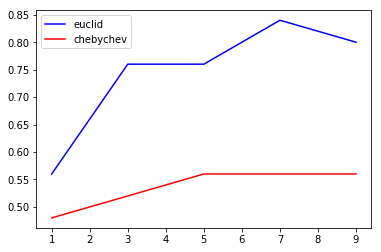

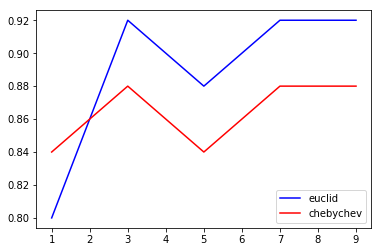

In [100]:
location = 'RobotDataset/Robot1'
test,train = get_test_train(location)
gen_KNN_plot(test,train)

location = 'RobotDataset/Robot2'
test,train = get_test_train(location)
gen_KNN_plot(test,train)